In [28]:
import pandas as pd

In [29]:
source_folder = 'source_folder'
saved_folder = 'saved_folder'

In [30]:
Test = pd.read_csv('test.data', header=None, sep = '\t')
Test_label = pd.read_csv('test.label', header=None, sep = '\t')
Dev = pd.read_csv('dev.data', header=None, sep = '\t')
Train = pd.read_csv('train.data', header=None, sep = '\t')

In [31]:
Train.head()

,0,1,2,3,4,5,6
0,4,1st QB,EJ Manuel the 1st QB to go in this draft,But my bro from the 757 EJ Manuel is the 1st Q...,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,But/O/CC/O/O my/O/PRP$/B-NP/O bro/O/NN/I-NP/O ...
1,4,1st QB,EJ Manuel the 1st QB to go in this draft,Can believe EJ Manuel went as the 1st QB in th...,"(5, 0)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Can/O/MD/B-VP/O believe/O/VB/I-VP/B-EVENT EJ/B...
2,4,1st QB,EJ Manuel the 1st QB to go in this draft,EJ MANUEL IS THE 1ST QB what,"(3, 2)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,EJ/B-person/NNP/B-NP/O MANUEL/I-person/NNP/I-N...
3,4,1st QB,EJ Manuel the 1st QB to go in this draft,EJ da 1st QB off da board,"(2, 3)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,EJ/O/NNP/B-NP/O da/O/DT/I-NP/O 1st/O/CD/I-NP/O...
4,4,1st QB,EJ Manuel the 1st QB to go in this draft,Manuel is the 1st QB to get drafted,"(4, 1)",EJ/B-person/NNP/B-NP/O Manuel/I-person/NNP/B-V...,Manuel/B-person/NNP/B-NP/O is/O/VBZ/B-VP/O the...


In [32]:
Column_name = ['ID', 'Topic_name', 'S1', 'S2', 'Label', 'S1Tag', 'S2Tag']

In [33]:
Train.columns = Column_name
Test.columns = Column_name
Dev.columns = Column_name

In [34]:
Train = Train.drop(Train.index[-1])

In [35]:
Test.head()

,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
0,51,8 Mile,All the home alones watching 8 mile,8 mile is on thats my movie,3,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,8/O/NN/B-NP/O mile/O/NN/I-NP/O is/O/VBZ/B-VP/O...
1,51,8 Mile,All the home alones watching 8 mile,The last rap battle in 8 Mile nevr gets old ahah,2,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O last/O/JJ/I-NP/O rap/O/NN/I-NP...
2,51,8 Mile,All the home alones watching 8 mile,The rap battle at the end of 8 mile gets me so...,2,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O rap/O/NN/I-NP/O battle/O/NN/I-...
3,51,8 Mile,The Ending to 8 Mile is my fav part of the who...,Rabbit on 8 mile out of place but determined t...,1,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,Rabbit/O/NNP/B-NP/O on/O/IN/B-PP/O 8/O/CD/B-NP...
4,51,8 Mile,The Ending to 8 Mile is my fav part of the who...,See 8 Mile is always on but it s the tv versio...,1,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,See/O/VB/B-VP/O 8/O/CD/B-NP/O Mile/O/NNP/I-NP/...


In [36]:
from tqdm import tqdm
def Define_Lable(df, lable_name):
    final_label = []
    dicard_line = []
    for i in tqdm(range(len(df))):
        if len(str(df[lable_name][i])) != 1:
            score1 = df[lable_name][i][1]
            score2 = df[lable_name][i][4]

            if int(score1) > 2:
                final_label.append(1)
            elif int(score1) == 2:
                dicard_line.append(i)
            else:
                final_label.append(0)
        else:
            score = int(df[lable_name][i])
            if score > 3:
                final_label.append(1)
            elif score == 3:
                dicard_line.append(i)
            else:
                final_label.append(0)
            
    final_df = df.drop(df.index[dicard_line])
    final_df[lable_name] = final_label
    return final_df

In [37]:
Train_final = Define_Lable(Train, 'Label')
Dev_final = Define_Lable(Dev, 'Label')
Test_final = Define_Lable(Test, 'Label')

100%|█████████████████████████████████████████████████████████████████████████████| 972/972 [00:00<00:00, 88612.06it/s]


In [38]:
# data preprocessing class
import re
from tqdm import tqdm
import emoji

class Word_Preprocessing():
    def eliminate_url(self,df,target):
        print('Start eliminate url: : )')
        df_temp = df
        target_column_name = target
        text = df_temp[target_column_name]
        for i in tqdm(text):
            urls = re.findall(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})', i)
            for i in urls:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    def eliminate_username(self,df,target):
        print('Start eliminate username: : )')
        df_temp = df
        target_column_name = target
        for i in tqdm(df_temp[target_column_name]):
            user_name = re.findall(r'@\w*', i)
            for i in user_name:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
     
    def eliminate_hashtag(self, df, target):
        df_temp = df
        target_column_name = target
        for i in tqdm(df_temp[target_column_name]):
            user_name = re.findall(r'#\w*', i)
            for i in user_name:
                df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ""))
        return df_temp
    
    def convert_abbreviation(self, df, target):
        df_temp = df
        target_column_name = target
        am = "'m"
        are = "'re"
        have = "'ve"
        not_ = "n't"
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(am, " am"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(are, "  are"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(have, " have"))
        df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(not_, " not"))
        return df_temp
        
    def lowercase_all(self, df, target):
        df_tmp = df
        tmp_str = [str.lower(i) for i in df[target]] 
        df_tmp[target] = tmp_str
        return df_tmp 
        
        
    def eliminate_symbol(self,df,target):
        print('Start eliminate symbol: : )')
        df_temp = df
        target_column_name = target
        symbol_list = [',',"'",'!','@','$','%','^','&','*','(',')','-','+','?','>','<','=','.',':',';','  ','  ','   ','    ','      ','      ','  ']
        for i in tqdm(symbol_list):
            df_temp[target_column_name] = df_temp[target_column_name].apply(lambda x: x.replace(i, ' '))
        return df_temp
    
    def process_all(self, df,target):
        df_temp = df
        target_column_name = target
        df_fresh = self.convert_abbreviation(df_temp,target_column_name)
        df_remove_url = self.eliminate_url(df_fresh,target_column_name)
        df_eliminate_hashtag = self.eliminate_hashtag(df_remove_url, target_column_name)
        df_remove_username = self.eliminate_username(df_eliminate_hashtag, target_column_name)
        df_remove_symbol = self.eliminate_symbol(df_remove_username, target_column_name)
        df_final = self.lowercase_all(df_remove_symbol, target_column_name)
        print("finished!!")
        return df_final

In [39]:
word_preprocesser = Word_Preprocessing()

In [40]:
tmp_Train = word_preprocesser.process_all(Train_final, 'S1')
Train_cleaned  = word_preprocesser.process_all(tmp_Train, 'S2')
tmp_Dev = word_preprocesser.process_all(Dev_final, 'S1')
Dev_cleaned = word_preprocesser.process_all(tmp_Dev, 'S2')
tmp_Test = word_preprocesser.process_all(Test_final, 'S1')
Test_cleaned = word_preprocesser.process_all(tmp_Test, 'S2')

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )


100%|████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 2255.95it/s]

finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!
Start eliminate url: : )
Start eliminate username: : )
Start eliminate symbol: : )
finished!!


In [47]:
Test_cleaned

,index,ID,Topic_name,S1,S2,Label,S1Tag,S2Tag
0,1,51,8 Mile,all the home alones watching 8 mile,the last rap battle in 8 mile nevr gets old ahah,0,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O last/O/JJ/I-NP/O rap/O/NN/I-NP...
1,2,51,8 Mile,all the home alones watching 8 mile,the rap battle at the end of 8 mile gets me so...,0,All/O/DT/B-NP/O the/O/DT/I-NP/O home/O/NN/I-NP...,The/O/DT/B-NP/O rap/O/NN/I-NP/O battle/O/NN/I-...
2,3,51,8 Mile,the ending to 8 mile is my fav part of the who...,rabbit on 8 mile out of place but determined t...,0,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,Rabbit/O/NNP/B-NP/O on/O/IN/B-PP/O 8/O/CD/B-NP...
3,4,51,8 Mile,the ending to 8 mile is my fav part of the who...,see 8 mile is always on but it s the tv versio...,0,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,See/O/VB/B-VP/O 8/O/CD/B-NP/O Mile/O/NNP/I-NP/...
4,5,51,8 Mile,the ending to 8 mile is my fav part of the who...,those last 3 battles in 8 mile are the shit,1,The/O/DT/B-NP/O Ending/O/VBG/I-NP/B-EVENT to/O...,Those/O/DT/B-NP/O last/O/JJ/I-NP/O 3/O/CD/I-NP...
...,...,...,...,...,...,...,...,...
833,967,5273,Z-Bo,ball dont lie zbo,if zbo didnt make that shot,0,Ball/O/NN/B-NP/O dont/O/MD/B-VP/O lie/O/VB/I-V...,If/O/IN/B-SBAR/O Zbo/O/NNP/B-NP/O didnt/O/MD/B...
834,968,5273,Z-Bo,the spurs own zbo,zbo is a fucking scrub,0,The/B-sportsteam/DT/B-NP/O Spurs/I-sportsteam/...,ZBo/B-person/NNP/B-NP/O is/O/VBZ/B-VP/O a/O/DT...
835,969,5273,Z-Bo,the spurs own zbo,zbo hit these free throws bruh,0,The/B-sportsteam/DT/B-NP/O Spurs/I-sportsteam/...,ZBo/O/MD/B-VP/O hit/O/VB/I-VP/B-EVENT these/O/...
836,970,5273,Z-Bo,the spurs own zbo,i told you feed zbo,0,The/B-sportsteam/DT/B-NP/O Spurs/I-sportsteam/...,I/O/PRP/B-NP/O told/O/VBD/B-VP/B-EVENT you/O/P...


In [48]:
test_label_column = ['Binary Label' ,'Degreed Score']

In [49]:
Test_label.columns = test_label_column

## model 2

In [50]:
from transformers import BertTokenizer
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator
import torch
from transformers import AdamW
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
device = torch.device('cuda:0')

In [52]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [53]:
Train_cleaned = Train_cleaned.reset_index()
Dev_cleaned = Dev_cleaned.reset_index()
Test_cleaned = Test_cleaned.reset_index()

In [54]:
def mergeSents(dataframe, s1_name, s2_name):
  s1 = dataframe[s1_name]
  s2 = dataframe[s2_name]
  tmp = []
  for i in tqdm(range(len(s1))):
    merged_sent = '[CLS] '+s1[i]+' [SEP] '+s2[i]
    tmp.append(merged_sent)
  return tmp

train_sent_tokens = mergeSents(Train_cleaned,'S1','S2')
dev_sent_tokens = mergeSents(Dev_cleaned,'S1','S2')
test_sent_tokens = mergeSents(Test_cleaned,'S1','S2')
train_sent_tokens[:5]

100%|████████████████████████████████████████████████████████████████████████████| 838/838 [00:00<00:00, 166943.42it/s]


['[CLS] ej manuel the 1st qb to go in this draft [SEP] but my bro from the 757 ej manuel is the 1st qb gone',
 '[CLS] ej manuel the 1st qb to go in this draft [SEP] can believe ej manuel went as the 1st qb in the draft',
 '[CLS] ej manuel the 1st qb to go in this draft [SEP] ej manuel is the 1st qb what',
 '[CLS] ej manuel the 1st qb to go in this draft [SEP] manuel is the 1st qb to get drafted',
 '[CLS] ej manuel the 1st qb to go in this draft [SEP] my boy ej manuel being the 1st qb picked']

In [55]:
train_final = {'sentences':train_sent_tokens,'label':Train_cleaned['Label']}
dev_final = {'sentences':dev_sent_tokens,'label':Dev_cleaned['Label']}
test_final = {'sentences':test_sent_tokens,'label':Test_cleaned['Label']}

train_df = pd.DataFrame(train_final)
dev_df = pd.DataFrame(dev_final)
test_df = pd.DataFrame(test_final)

train_df.to_csv('train_df.csv',header=True)
dev_df.to_csv('dev_df.csv',header=True)
test_df.to_csv('test_df.csv',header=True)

In [56]:
sent_len = []
for i in train_sent_tokens:
    tmp = i.split(' ')
    sent_len.append(len(tmp))

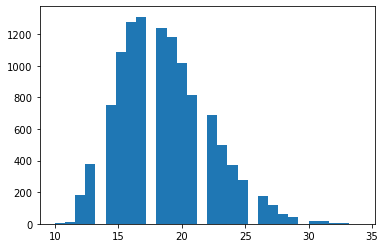

the range of the sentence token is: (10, 34)


In [57]:
import matplotlib.pyplot as plt
plt.hist(sent_len, bins = 30)
plt.show()
print('the range of the sentence token is:', (min(sent_len),max(sent_len)))

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11530 entries, 0 to 11529
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentences  11530 non-null  object
 1   label      11530 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 180.3+ KB


In [59]:
count = 0
for i in train_df['label']:
    if i == 1:
        count +=1
print(count/len(train_df))

0.3465741543798786


In [60]:
max_len = 35
BATCH_SIZE = 8
pad_index = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
unk_index = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

label_field = Field(sequential = False, use_vocab=False, batch_first=True)
text_field = Field(use_vocab=False, tokenize = tokenizer.encode, include_lengths=False, 
                   batch_first=True, fix_length=max_len,pad_token = pad_index,unk_token=unk_index)
fields = [('sentences', text_field), ('label', label_field)]



train, dev, test = TabularDataset.splits(path=source_folder, train='train_df.csv',
                                           validation='dev_df.csv',
                                           test='test_df.csv', format='CSV', 
                                           fields=fields, skip_header=True)


train_iter = BucketIterator(train, batch_size=BATCH_SIZE, sort_key=lambda x: len(x.sentences),
                            device=device, train=True, sort=True, sort_within_batch=True)
dev_iter = BucketIterator(dev, batch_size=BATCH_SIZE, sort_key=lambda x: len(x.sentences),
                            device=device, train=True, sort=True, sort_within_batch=True)
test_iter = Iterator(test, batch_size=BATCH_SIZE, device=device, train=False, shuffle=False, sort=False)

In [15]:
# Functions for saving and loading model parameters and metrics.
def save_checkpoint(path, model, valid_loss):
    torch.save({'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}, path)

    
def load_checkpoint(path, model):    
    state_dict = torch.load(path, map_location=device)
    model.load_state_dict(state_dict['model_state_dict'])
    
    return state_dict['valid_loss']


def save_metrics(path, train_loss_list, valid_loss_list, global_steps_list):   
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, path)


def load_metrics(path):    
    state_dict = torch.load(path, map_location=device)
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [16]:
from transformers import BertForSequenceClassification

In [17]:
class BertClassifier(torch.nn.Module):
    def __init__(self):
        super(BertClassifier,self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased')
    
    def forward(self,input_ids, attention_mask):
        x = self.bert(input_ids=input_ids, attention_mask = attention_mask)
        return x

In [18]:
model = BertClassifier().to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [19]:
model

BertClassifier(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=Tru

In [20]:
def train(model, optimizer, train_iter, dev_iter, epochs):
    model.train()
    train_loss = 0.0
    dev_loss = 0.0
    global_step = 0
    
    for epoch in range(epochs):
        count = 0
        for (source, target), _ in train_iter:
            mask = (source!=pad_index).type(torch.uint8)
            y_pred = model(input_ids = source, attention_mask=mask)[0]
            loss = torch.nn.CrossEntropyLoss()(y_pred,target)
            print('batch_no[{}/{}]:'.format(count, int(len(train_iter))),'training_loss:', loss)
            count+=1
            loss.backward()
            
            
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss == loss.item()
            global_step += 1
            
            if global_step% len(train_iter)==0:
                model.eval()
                
                with torch.no_grad():
                    for (source,target), _ in dev_iter:
                        mask = (source != pad_index).type(torch.uint8)
                        
                        y_pred = model(input_ids = source, attention_mask = mask)[0]
                        
                        loss = torch.nn.CrossEntropyLoss()(y_pred, target)
                        
                        dev_loss += loss.item()
                        
                train_loss = train_loss/ len(train_iter)
                dev_loss = dev_loss/len(dev_iter)
                
                model.train()
                print('Epoch [{}/{}],global step [{}/{}], pt loss:{:.4f}, dev loss:{:.4f}'.format(epoch+1, epochs, 
                                                                                                  global_step, 
                                                                                                  epochs*len(train_iter),
                                                                                                 train_loss,
                                                                                              dev_loss))
                train_loss = 0.0
                dev_loss = 0.0

In [21]:
optimizer = AdamW(model.parameters(), lr = 2e-6)
Num_Epoch = 3
train(model = model, train_iter=train_iter, dev_iter=dev_iter,optimizer=optimizer,epochs = Num_Epoch)

batch_no[0/1442]: training_loss: tensor(0.8335, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1/1442]: training_loss: tensor(0.7971, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[2/1442]: training_loss: tensor(1.0228, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[3/1442]: training_loss: tensor(0.7799, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[4/1442]: training_loss: tensor(0.8429, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[5/1442]: training_loss: tensor(0.8874, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[6/1442]: training_loss: tensor(0.7724, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[7/1442]: training_loss: tensor(0.8379, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[8/1442]: training_loss: tensor(0.7134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[9/1442]: training_loss: tensor(0.8096, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[10/1442]: training_loss: tensor(0.7466, device='cuda:0', grad_fn=<NllLo

batch_no[89/1442]: training_loss: tensor(0.4510, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[90/1442]: training_loss: tensor(0.4366, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[91/1442]: training_loss: tensor(0.3785, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[92/1442]: training_loss: tensor(0.4548, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[93/1442]: training_loss: tensor(0.3418, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[94/1442]: training_loss: tensor(0.5831, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[95/1442]: training_loss: tensor(0.7487, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[96/1442]: training_loss: tensor(0.6462, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[97/1442]: training_loss: tensor(0.3199, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[98/1442]: training_loss: tensor(0.5552, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[99/1442]: training_loss: tensor(0.9463, device='cuda:0', grad

batch_no[179/1442]: training_loss: tensor(0.9548, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[180/1442]: training_loss: tensor(0.9639, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[181/1442]: training_loss: tensor(0.8750, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[182/1442]: training_loss: tensor(0.7167, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[183/1442]: training_loss: tensor(0.2736, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[184/1442]: training_loss: tensor(0.3088, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[185/1442]: training_loss: tensor(0.7793, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[186/1442]: training_loss: tensor(0.2651, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[187/1442]: training_loss: tensor(1.0314, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[188/1442]: training_loss: tensor(1.3013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[189/1442]: training_loss: tensor(1.3196, device='cu

batch_no[269/1442]: training_loss: tensor(0.4474, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[270/1442]: training_loss: tensor(0.4855, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[271/1442]: training_loss: tensor(0.3029, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[272/1442]: training_loss: tensor(0.4051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[273/1442]: training_loss: tensor(0.5298, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[274/1442]: training_loss: tensor(0.7582, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[275/1442]: training_loss: tensor(0.4032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[276/1442]: training_loss: tensor(0.5261, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[277/1442]: training_loss: tensor(0.6293, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[278/1442]: training_loss: tensor(0.4183, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[279/1442]: training_loss: tensor(0.2735, device='cu

batch_no[359/1442]: training_loss: tensor(0.4055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[360/1442]: training_loss: tensor(0.9112, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[361/1442]: training_loss: tensor(0.9295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[362/1442]: training_loss: tensor(0.5006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[363/1442]: training_loss: tensor(0.5720, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[364/1442]: training_loss: tensor(0.8371, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[365/1442]: training_loss: tensor(0.6198, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[366/1442]: training_loss: tensor(0.6703, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[367/1442]: training_loss: tensor(0.4947, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[368/1442]: training_loss: tensor(0.3987, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[369/1442]: training_loss: tensor(0.2716, device='cu

batch_no[449/1442]: training_loss: tensor(0.8254, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[450/1442]: training_loss: tensor(0.3727, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[451/1442]: training_loss: tensor(0.3236, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[452/1442]: training_loss: tensor(0.5152, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[453/1442]: training_loss: tensor(0.2752, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[454/1442]: training_loss: tensor(0.6202, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[455/1442]: training_loss: tensor(0.9456, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[456/1442]: training_loss: tensor(0.6254, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[457/1442]: training_loss: tensor(0.4059, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[458/1442]: training_loss: tensor(0.8041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[459/1442]: training_loss: tensor(0.4802, device='cu

batch_no[539/1442]: training_loss: tensor(0.7032, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[540/1442]: training_loss: tensor(0.5238, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[541/1442]: training_loss: tensor(0.5823, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[542/1442]: training_loss: tensor(0.3954, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[543/1442]: training_loss: tensor(0.6235, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[544/1442]: training_loss: tensor(0.3190, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[545/1442]: training_loss: tensor(0.4220, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[546/1442]: training_loss: tensor(0.5856, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[547/1442]: training_loss: tensor(0.5928, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[548/1442]: training_loss: tensor(0.4662, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[549/1442]: training_loss: tensor(0.5727, device='cu

batch_no[629/1442]: training_loss: tensor(0.6789, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[630/1442]: training_loss: tensor(0.5267, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[631/1442]: training_loss: tensor(0.6301, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[632/1442]: training_loss: tensor(0.4611, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[633/1442]: training_loss: tensor(0.4409, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[634/1442]: training_loss: tensor(0.5255, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[635/1442]: training_loss: tensor(0.7053, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[636/1442]: training_loss: tensor(0.6205, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[637/1442]: training_loss: tensor(0.6456, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[638/1442]: training_loss: tensor(0.6165, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[639/1442]: training_loss: tensor(0.4453, device='cu

batch_no[719/1442]: training_loss: tensor(0.4093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[720/1442]: training_loss: tensor(0.3537, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[721/1442]: training_loss: tensor(0.2873, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[722/1442]: training_loss: tensor(0.6087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[723/1442]: training_loss: tensor(0.3355, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[724/1442]: training_loss: tensor(0.6148, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[725/1442]: training_loss: tensor(0.3043, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[726/1442]: training_loss: tensor(0.7341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[727/1442]: training_loss: tensor(0.4101, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[728/1442]: training_loss: tensor(0.5891, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[729/1442]: training_loss: tensor(0.7872, device='cu

batch_no[809/1442]: training_loss: tensor(0.3304, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[810/1442]: training_loss: tensor(0.6068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[811/1442]: training_loss: tensor(0.5041, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[812/1442]: training_loss: tensor(0.8094, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[813/1442]: training_loss: tensor(0.7284, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[814/1442]: training_loss: tensor(0.5347, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[815/1442]: training_loss: tensor(0.6021, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[816/1442]: training_loss: tensor(0.1660, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[817/1442]: training_loss: tensor(0.2536, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[818/1442]: training_loss: tensor(0.3867, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[819/1442]: training_loss: tensor(0.4835, device='cu

batch_no[899/1442]: training_loss: tensor(0.1705, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[900/1442]: training_loss: tensor(0.1349, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[901/1442]: training_loss: tensor(0.5565, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[902/1442]: training_loss: tensor(0.3951, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[903/1442]: training_loss: tensor(0.2455, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[904/1442]: training_loss: tensor(0.5697, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[905/1442]: training_loss: tensor(0.8365, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[906/1442]: training_loss: tensor(0.2440, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[907/1442]: training_loss: tensor(0.7623, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[908/1442]: training_loss: tensor(0.3386, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[909/1442]: training_loss: tensor(0.1827, device='cu

batch_no[989/1442]: training_loss: tensor(0.4322, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[990/1442]: training_loss: tensor(0.4209, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[991/1442]: training_loss: tensor(0.3423, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[992/1442]: training_loss: tensor(0.6676, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[993/1442]: training_loss: tensor(0.2971, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[994/1442]: training_loss: tensor(1.2031, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[995/1442]: training_loss: tensor(0.3054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[996/1442]: training_loss: tensor(0.5433, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[997/1442]: training_loss: tensor(0.4541, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[998/1442]: training_loss: tensor(0.6065, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[999/1442]: training_loss: tensor(0.4199, device='cu

batch_no[1076/1442]: training_loss: tensor(0.2935, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1077/1442]: training_loss: tensor(0.7121, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1078/1442]: training_loss: tensor(0.3721, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1079/1442]: training_loss: tensor(0.6650, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1080/1442]: training_loss: tensor(0.3907, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1081/1442]: training_loss: tensor(0.5239, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1082/1442]: training_loss: tensor(0.3435, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1083/1442]: training_loss: tensor(0.5341, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1084/1442]: training_loss: tensor(0.2790, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1085/1442]: training_loss: tensor(0.9425, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1086/1442]: training_loss: tensor(0.5273,

batch_no[1163/1442]: training_loss: tensor(0.2232, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1164/1442]: training_loss: tensor(0.2723, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1165/1442]: training_loss: tensor(0.4685, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1166/1442]: training_loss: tensor(0.3635, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1167/1442]: training_loss: tensor(0.7648, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1168/1442]: training_loss: tensor(0.4723, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1169/1442]: training_loss: tensor(0.5301, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1170/1442]: training_loss: tensor(0.4344, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1171/1442]: training_loss: tensor(0.7360, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1172/1442]: training_loss: tensor(0.5268, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1173/1442]: training_loss: tensor(0.4200,

batch_no[1250/1442]: training_loss: tensor(0.3463, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1251/1442]: training_loss: tensor(0.5890, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1252/1442]: training_loss: tensor(0.5649, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1253/1442]: training_loss: tensor(0.5958, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1254/1442]: training_loss: tensor(0.6007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1255/1442]: training_loss: tensor(0.4948, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1256/1442]: training_loss: tensor(0.5230, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1257/1442]: training_loss: tensor(0.4001, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1258/1442]: training_loss: tensor(0.3535, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1259/1442]: training_loss: tensor(0.6417, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1260/1442]: training_loss: tensor(0.7666,

batch_no[1337/1442]: training_loss: tensor(0.1115, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1338/1442]: training_loss: tensor(0.2225, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1339/1442]: training_loss: tensor(0.6132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1340/1442]: training_loss: tensor(0.5056, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1341/1442]: training_loss: tensor(0.3763, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1342/1442]: training_loss: tensor(0.3776, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1343/1442]: training_loss: tensor(0.7889, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1344/1442]: training_loss: tensor(0.5899, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1345/1442]: training_loss: tensor(0.4282, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1346/1442]: training_loss: tensor(0.6363, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1347/1442]: training_loss: tensor(0.2090,

batch_no[1425/1442]: training_loss: tensor(0.3483, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1426/1442]: training_loss: tensor(0.2208, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1427/1442]: training_loss: tensor(0.5850, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1428/1442]: training_loss: tensor(0.2491, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1429/1442]: training_loss: tensor(0.4197, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1430/1442]: training_loss: tensor(0.3849, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1431/1442]: training_loss: tensor(0.4217, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1432/1442]: training_loss: tensor(0.5093, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1433/1442]: training_loss: tensor(0.7521, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1434/1442]: training_loss: tensor(0.4922, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1435/1442]: training_loss: tensor(0.3596,

batch_no[72/1442]: training_loss: tensor(0.2500, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[73/1442]: training_loss: tensor(0.1009, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[74/1442]: training_loss: tensor(0.2002, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[75/1442]: training_loss: tensor(0.0894, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[76/1442]: training_loss: tensor(0.3177, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[77/1442]: training_loss: tensor(0.2901, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[78/1442]: training_loss: tensor(0.1623, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[79/1442]: training_loss: tensor(0.3837, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[80/1442]: training_loss: tensor(0.5480, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[81/1442]: training_loss: tensor(0.7142, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[82/1442]: training_loss: tensor(0.0898, device='cuda:0', grad

batch_no[162/1442]: training_loss: tensor(0.0626, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[163/1442]: training_loss: tensor(0.0658, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[164/1442]: training_loss: tensor(0.1287, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[165/1442]: training_loss: tensor(0.3412, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[166/1442]: training_loss: tensor(0.4860, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[167/1442]: training_loss: tensor(0.6900, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[168/1442]: training_loss: tensor(0.5008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[169/1442]: training_loss: tensor(0.0820, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[170/1442]: training_loss: tensor(0.3867, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[171/1442]: training_loss: tensor(0.5553, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[172/1442]: training_loss: tensor(0.2795, device='cu

batch_no[252/1442]: training_loss: tensor(0.5892, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[253/1442]: training_loss: tensor(0.1920, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[254/1442]: training_loss: tensor(0.4295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[255/1442]: training_loss: tensor(0.4464, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[256/1442]: training_loss: tensor(0.0821, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[257/1442]: training_loss: tensor(0.3619, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[258/1442]: training_loss: tensor(0.4695, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[259/1442]: training_loss: tensor(0.3608, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[260/1442]: training_loss: tensor(0.1174, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[261/1442]: training_loss: tensor(0.3484, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[262/1442]: training_loss: tensor(0.5790, device='cu

batch_no[342/1442]: training_loss: tensor(0.2761, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[343/1442]: training_loss: tensor(0.3569, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[344/1442]: training_loss: tensor(0.3003, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[345/1442]: training_loss: tensor(0.4892, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[346/1442]: training_loss: tensor(1.0448, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[347/1442]: training_loss: tensor(0.5474, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[348/1442]: training_loss: tensor(0.1508, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[349/1442]: training_loss: tensor(0.2164, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[350/1442]: training_loss: tensor(0.1851, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[351/1442]: training_loss: tensor(0.3433, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[352/1442]: training_loss: tensor(0.5477, device='cu

batch_no[432/1442]: training_loss: tensor(0.4321, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[433/1442]: training_loss: tensor(0.2343, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[434/1442]: training_loss: tensor(0.5275, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[435/1442]: training_loss: tensor(0.0810, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[436/1442]: training_loss: tensor(0.1089, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[437/1442]: training_loss: tensor(0.7573, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[438/1442]: training_loss: tensor(0.3222, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[439/1442]: training_loss: tensor(0.4639, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[440/1442]: training_loss: tensor(0.4886, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[441/1442]: training_loss: tensor(0.2331, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[442/1442]: training_loss: tensor(0.4797, device='cu

batch_no[522/1442]: training_loss: tensor(0.8127, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[523/1442]: training_loss: tensor(0.7607, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[524/1442]: training_loss: tensor(0.1711, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[525/1442]: training_loss: tensor(0.3116, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[526/1442]: training_loss: tensor(0.4160, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[527/1442]: training_loss: tensor(0.6674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[528/1442]: training_loss: tensor(0.6060, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[529/1442]: training_loss: tensor(0.5473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[530/1442]: training_loss: tensor(0.3235, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[531/1442]: training_loss: tensor(0.5007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[532/1442]: training_loss: tensor(0.3405, device='cu

batch_no[612/1442]: training_loss: tensor(0.0785, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[613/1442]: training_loss: tensor(0.4132, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[614/1442]: training_loss: tensor(0.3708, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[615/1442]: training_loss: tensor(0.5313, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[616/1442]: training_loss: tensor(0.3674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[617/1442]: training_loss: tensor(0.2398, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[618/1442]: training_loss: tensor(0.1574, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[619/1442]: training_loss: tensor(0.3134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[620/1442]: training_loss: tensor(0.0853, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[621/1442]: training_loss: tensor(0.3701, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[622/1442]: training_loss: tensor(0.6728, device='cu

batch_no[702/1442]: training_loss: tensor(0.2144, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[703/1442]: training_loss: tensor(0.1911, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[704/1442]: training_loss: tensor(0.5854, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[705/1442]: training_loss: tensor(0.3290, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[706/1442]: training_loss: tensor(0.2749, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[707/1442]: training_loss: tensor(0.4349, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[708/1442]: training_loss: tensor(0.7164, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[709/1442]: training_loss: tensor(0.1080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[710/1442]: training_loss: tensor(0.6006, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[711/1442]: training_loss: tensor(0.3385, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[712/1442]: training_loss: tensor(0.1832, device='cu

batch_no[792/1442]: training_loss: tensor(0.0794, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[793/1442]: training_loss: tensor(0.1861, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[794/1442]: training_loss: tensor(0.5755, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[795/1442]: training_loss: tensor(0.5192, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[796/1442]: training_loss: tensor(0.4068, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[797/1442]: training_loss: tensor(0.2514, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[798/1442]: training_loss: tensor(0.2435, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[799/1442]: training_loss: tensor(0.1440, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[800/1442]: training_loss: tensor(0.2687, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[801/1442]: training_loss: tensor(0.8184, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[802/1442]: training_loss: tensor(0.2860, device='cu

batch_no[882/1442]: training_loss: tensor(0.5301, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[883/1442]: training_loss: tensor(0.2966, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[884/1442]: training_loss: tensor(0.4189, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[885/1442]: training_loss: tensor(0.2534, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[886/1442]: training_loss: tensor(0.8128, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[887/1442]: training_loss: tensor(0.1683, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[888/1442]: training_loss: tensor(0.6014, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[889/1442]: training_loss: tensor(0.9666, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[890/1442]: training_loss: tensor(0.0890, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[891/1442]: training_loss: tensor(0.3267, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[892/1442]: training_loss: tensor(0.1617, device='cu

batch_no[972/1442]: training_loss: tensor(0.1537, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[973/1442]: training_loss: tensor(0.1560, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[974/1442]: training_loss: tensor(0.4172, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[975/1442]: training_loss: tensor(0.3707, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[976/1442]: training_loss: tensor(0.3005, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[977/1442]: training_loss: tensor(0.3250, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[978/1442]: training_loss: tensor(0.0760, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[979/1442]: training_loss: tensor(0.6295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[980/1442]: training_loss: tensor(0.2007, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[981/1442]: training_loss: tensor(0.2127, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[982/1442]: training_loss: tensor(0.3970, device='cu

batch_no[1059/1442]: training_loss: tensor(0.3320, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1060/1442]: training_loss: tensor(0.5126, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1061/1442]: training_loss: tensor(0.2474, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1062/1442]: training_loss: tensor(0.3245, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1063/1442]: training_loss: tensor(0.1377, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1064/1442]: training_loss: tensor(0.4170, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1065/1442]: training_loss: tensor(0.5299, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1066/1442]: training_loss: tensor(0.3604, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1067/1442]: training_loss: tensor(0.2399, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1068/1442]: training_loss: tensor(0.5207, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1069/1442]: training_loss: tensor(0.1435,

batch_no[1146/1442]: training_loss: tensor(0.3848, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1147/1442]: training_loss: tensor(0.1240, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1148/1442]: training_loss: tensor(0.2925, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1149/1442]: training_loss: tensor(0.6137, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1150/1442]: training_loss: tensor(0.3637, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1151/1442]: training_loss: tensor(0.2419, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1152/1442]: training_loss: tensor(0.4535, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1153/1442]: training_loss: tensor(0.4331, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1154/1442]: training_loss: tensor(0.1205, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1155/1442]: training_loss: tensor(0.0945, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1156/1442]: training_loss: tensor(0.0675,

batch_no[1233/1442]: training_loss: tensor(0.3108, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1234/1442]: training_loss: tensor(0.0470, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1235/1442]: training_loss: tensor(0.5055, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1236/1442]: training_loss: tensor(0.3865, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1237/1442]: training_loss: tensor(0.2943, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1238/1442]: training_loss: tensor(0.4268, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1239/1442]: training_loss: tensor(0.4109, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1240/1442]: training_loss: tensor(0.6008, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1241/1442]: training_loss: tensor(0.1027, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1242/1442]: training_loss: tensor(0.3054, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1243/1442]: training_loss: tensor(0.1847,

batch_no[1320/1442]: training_loss: tensor(0.0932, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1321/1442]: training_loss: tensor(0.6942, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1322/1442]: training_loss: tensor(0.7083, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1323/1442]: training_loss: tensor(0.1500, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1324/1442]: training_loss: tensor(0.3070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1325/1442]: training_loss: tensor(0.3262, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1326/1442]: training_loss: tensor(1.1565, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1327/1442]: training_loss: tensor(0.2793, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1328/1442]: training_loss: tensor(0.3890, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1329/1442]: training_loss: tensor(0.5764, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1330/1442]: training_loss: tensor(0.2142,

batch_no[1407/1442]: training_loss: tensor(0.5334, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1408/1442]: training_loss: tensor(0.2783, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1409/1442]: training_loss: tensor(0.7594, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1410/1442]: training_loss: tensor(0.5081, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1411/1442]: training_loss: tensor(0.5914, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1412/1442]: training_loss: tensor(0.3066, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1413/1442]: training_loss: tensor(0.3670, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1414/1442]: training_loss: tensor(0.7688, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1415/1442]: training_loss: tensor(0.3149, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1416/1442]: training_loss: tensor(0.3927, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1417/1442]: training_loss: tensor(0.2165,

batch_no[54/1442]: training_loss: tensor(0.3414, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[55/1442]: training_loss: tensor(0.7558, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[56/1442]: training_loss: tensor(1.5828, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[57/1442]: training_loss: tensor(0.4769, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[58/1442]: training_loss: tensor(0.7295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[59/1442]: training_loss: tensor(0.0851, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[60/1442]: training_loss: tensor(0.3707, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[61/1442]: training_loss: tensor(0.1585, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[62/1442]: training_loss: tensor(0.5681, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[63/1442]: training_loss: tensor(0.3473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[64/1442]: training_loss: tensor(0.0926, device='cuda:0', grad

batch_no[144/1442]: training_loss: tensor(0.1806, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[145/1442]: training_loss: tensor(0.2397, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[146/1442]: training_loss: tensor(0.1070, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[147/1442]: training_loss: tensor(0.2313, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[148/1442]: training_loss: tensor(0.4717, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[149/1442]: training_loss: tensor(0.4767, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[150/1442]: training_loss: tensor(0.2738, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[151/1442]: training_loss: tensor(0.1711, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[152/1442]: training_loss: tensor(0.4168, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[153/1442]: training_loss: tensor(0.5291, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[154/1442]: training_loss: tensor(0.2849, device='cu

batch_no[234/1442]: training_loss: tensor(0.0382, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[235/1442]: training_loss: tensor(0.2244, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[236/1442]: training_loss: tensor(0.3015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[237/1442]: training_loss: tensor(0.2063, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[238/1442]: training_loss: tensor(0.2250, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[239/1442]: training_loss: tensor(0.3402, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[240/1442]: training_loss: tensor(0.3475, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[241/1442]: training_loss: tensor(0.6396, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[242/1442]: training_loss: tensor(0.3258, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[243/1442]: training_loss: tensor(0.1882, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[244/1442]: training_loss: tensor(0.3654, device='cu

batch_no[324/1442]: training_loss: tensor(0.9273, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[325/1442]: training_loss: tensor(0.1473, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[326/1442]: training_loss: tensor(0.0838, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[327/1442]: training_loss: tensor(0.4475, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[328/1442]: training_loss: tensor(0.2134, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[329/1442]: training_loss: tensor(0.2376, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[330/1442]: training_loss: tensor(0.9546, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[331/1442]: training_loss: tensor(0.1637, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[332/1442]: training_loss: tensor(0.1745, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[333/1442]: training_loss: tensor(0.1438, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[334/1442]: training_loss: tensor(0.2324, device='cu

batch_no[414/1442]: training_loss: tensor(0.2024, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[415/1442]: training_loss: tensor(0.5605, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[416/1442]: training_loss: tensor(0.1015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[417/1442]: training_loss: tensor(1.2213, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[418/1442]: training_loss: tensor(0.2297, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[419/1442]: training_loss: tensor(0.0696, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[420/1442]: training_loss: tensor(0.5800, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[421/1442]: training_loss: tensor(0.2674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[422/1442]: training_loss: tensor(0.1842, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[423/1442]: training_loss: tensor(0.0350, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[424/1442]: training_loss: tensor(0.0945, device='cu

batch_no[504/1442]: training_loss: tensor(0.2678, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[505/1442]: training_loss: tensor(0.0854, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[506/1442]: training_loss: tensor(0.1717, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[507/1442]: training_loss: tensor(0.1228, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[508/1442]: training_loss: tensor(0.6604, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[509/1442]: training_loss: tensor(0.0504, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[510/1442]: training_loss: tensor(0.0957, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[511/1442]: training_loss: tensor(0.3295, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[512/1442]: training_loss: tensor(0.3995, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[513/1442]: training_loss: tensor(0.0674, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[514/1442]: training_loss: tensor(0.0327, device='cu

batch_no[594/1442]: training_loss: tensor(0.6794, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[595/1442]: training_loss: tensor(0.2841, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[596/1442]: training_loss: tensor(0.3811, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[597/1442]: training_loss: tensor(0.7747, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[598/1442]: training_loss: tensor(0.4221, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[599/1442]: training_loss: tensor(0.1497, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[600/1442]: training_loss: tensor(0.2333, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[601/1442]: training_loss: tensor(0.4581, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[602/1442]: training_loss: tensor(0.0680, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[603/1442]: training_loss: tensor(0.1549, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[604/1442]: training_loss: tensor(0.0462, device='cu

batch_no[684/1442]: training_loss: tensor(0.2797, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[685/1442]: training_loss: tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[686/1442]: training_loss: tensor(0.6758, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[687/1442]: training_loss: tensor(0.3653, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[688/1442]: training_loss: tensor(0.1628, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[689/1442]: training_loss: tensor(0.1898, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[690/1442]: training_loss: tensor(0.0695, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[691/1442]: training_loss: tensor(0.0550, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[692/1442]: training_loss: tensor(0.0947, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[693/1442]: training_loss: tensor(0.1504, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[694/1442]: training_loss: tensor(0.1715, device='cu

batch_no[774/1442]: training_loss: tensor(0.2744, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[775/1442]: training_loss: tensor(0.2382, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[776/1442]: training_loss: tensor(0.5151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[777/1442]: training_loss: tensor(0.3421, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[778/1442]: training_loss: tensor(0.0406, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[779/1442]: training_loss: tensor(0.0847, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[780/1442]: training_loss: tensor(0.0240, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[781/1442]: training_loss: tensor(0.0376, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[782/1442]: training_loss: tensor(0.0278, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[783/1442]: training_loss: tensor(0.1179, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[784/1442]: training_loss: tensor(0.4993, device='cu

batch_no[864/1442]: training_loss: tensor(0.2313, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[865/1442]: training_loss: tensor(0.0368, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[866/1442]: training_loss: tensor(0.0652, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[867/1442]: training_loss: tensor(0.0325, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[868/1442]: training_loss: tensor(0.0963, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[869/1442]: training_loss: tensor(0.8015, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[870/1442]: training_loss: tensor(0.3087, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[871/1442]: training_loss: tensor(0.0506, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[872/1442]: training_loss: tensor(0.3481, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[873/1442]: training_loss: tensor(0.5097, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[874/1442]: training_loss: tensor(0.5662, device='cu

batch_no[954/1442]: training_loss: tensor(0.4407, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[955/1442]: training_loss: tensor(0.3855, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[956/1442]: training_loss: tensor(0.2566, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[957/1442]: training_loss: tensor(0.2051, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[958/1442]: training_loss: tensor(0.9771, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[959/1442]: training_loss: tensor(0.1151, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[960/1442]: training_loss: tensor(0.1360, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[961/1442]: training_loss: tensor(0.2314, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[962/1442]: training_loss: tensor(0.1486, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[963/1442]: training_loss: tensor(0.0974, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[964/1442]: training_loss: tensor(0.1033, device='cu

batch_no[1041/1442]: training_loss: tensor(0.3892, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1042/1442]: training_loss: tensor(0.3257, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1043/1442]: training_loss: tensor(0.3294, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1044/1442]: training_loss: tensor(0.1884, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1045/1442]: training_loss: tensor(0.3564, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1046/1442]: training_loss: tensor(0.3722, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1047/1442]: training_loss: tensor(0.0381, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1048/1442]: training_loss: tensor(0.3694, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1049/1442]: training_loss: tensor(0.4317, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1050/1442]: training_loss: tensor(0.2623, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1051/1442]: training_loss: tensor(0.1689,

batch_no[1128/1442]: training_loss: tensor(0.1013, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1129/1442]: training_loss: tensor(0.4892, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1130/1442]: training_loss: tensor(0.0680, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1131/1442]: training_loss: tensor(0.0892, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1132/1442]: training_loss: tensor(0.3238, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1133/1442]: training_loss: tensor(0.3616, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1134/1442]: training_loss: tensor(0.2683, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1135/1442]: training_loss: tensor(0.3717, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1136/1442]: training_loss: tensor(0.0644, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1137/1442]: training_loss: tensor(0.0818, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1138/1442]: training_loss: tensor(0.4026,

batch_no[1215/1442]: training_loss: tensor(0.2718, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1216/1442]: training_loss: tensor(0.2046, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1217/1442]: training_loss: tensor(0.0796, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1218/1442]: training_loss: tensor(0.2223, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1219/1442]: training_loss: tensor(0.6325, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1220/1442]: training_loss: tensor(0.4367, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1221/1442]: training_loss: tensor(0.0671, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1222/1442]: training_loss: tensor(0.1739, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1223/1442]: training_loss: tensor(0.0499, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1224/1442]: training_loss: tensor(0.1004, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1225/1442]: training_loss: tensor(0.1284,

batch_no[1302/1442]: training_loss: tensor(0.5173, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1303/1442]: training_loss: tensor(0.5768, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1304/1442]: training_loss: tensor(0.0736, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1305/1442]: training_loss: tensor(0.0878, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1306/1442]: training_loss: tensor(0.1080, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1307/1442]: training_loss: tensor(0.0360, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1308/1442]: training_loss: tensor(0.5272, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1309/1442]: training_loss: tensor(0.1813, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1310/1442]: training_loss: tensor(0.2548, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1311/1442]: training_loss: tensor(0.7771, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1312/1442]: training_loss: tensor(0.4080,

batch_no[1389/1442]: training_loss: tensor(0.2627, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1390/1442]: training_loss: tensor(0.1600, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1391/1442]: training_loss: tensor(0.0765, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1392/1442]: training_loss: tensor(0.1422, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1393/1442]: training_loss: tensor(0.0702, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1394/1442]: training_loss: tensor(0.4044, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1395/1442]: training_loss: tensor(0.1314, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1396/1442]: training_loss: tensor(0.5565, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1397/1442]: training_loss: tensor(0.1316, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1398/1442]: training_loss: tensor(0.3786, device='cuda:0', grad_fn=<NllLossBackward>)
batch_no[1399/1442]: training_loss: tensor(0.4485,

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Evaluation Function
import seaborn as sns
def evaluate(model, test_loader):
    y_pred = []
    y_true = []
    y_prob = []
    model.eval()
    with torch.no_grad():
        for (source, target), _ in test_loader:
                mask = (source != pad_index).type(torch.uint8)
                
                output = model(source, attention_mask=mask)[0]
                y_prob.extend(output.tolist())
                y_pred.extend(torch.argmax(output, axis=-1).tolist())
                y_true.extend(target.tolist())
    
    label_true = []
    for i in y_true:
        if i == 1:
            label_true.append([1,0])
        else:
            label_true.append([0,1])
    y_prob_final = []
    for i in range(len(y_prob)):
        tempA = abs(y_prob[i][0])
        tempB = abs(y_prob[i][1])
        y_prob_final.append(tempA/(tempA+tempB))

    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))

    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    plt.figure(1, figsize=(20,8))

    ax= plt.subplot(121)
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['Attack', 'Not attack'])
    ax.yaxis.set_ticklabels(['Attack', 'Not attack'])
    fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_true, y_prob_final)
    plt.subplot(122)
    lw = 2
    plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
             lw=lw, label='roc curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    print('Accuracy is:', accuracy_score(y_true, y_pred))
    print('Precision is:', precision_score(y_true, y_pred))
    print('Recall is:', recall_score(y_true, y_pred))
    print('F1 score is:', f1_score(y_true, y_pred))
    return y_pred

Classification Report:
              precision    recall  f1-score   support

           1     0.6356    0.5388    0.5832      1470
           0     0.7659    0.8301    0.7967      2672

    accuracy                         0.7267      4142
   macro avg     0.7008    0.6844    0.6900      4142
weighted avg     0.7197    0.7267    0.7209      4142



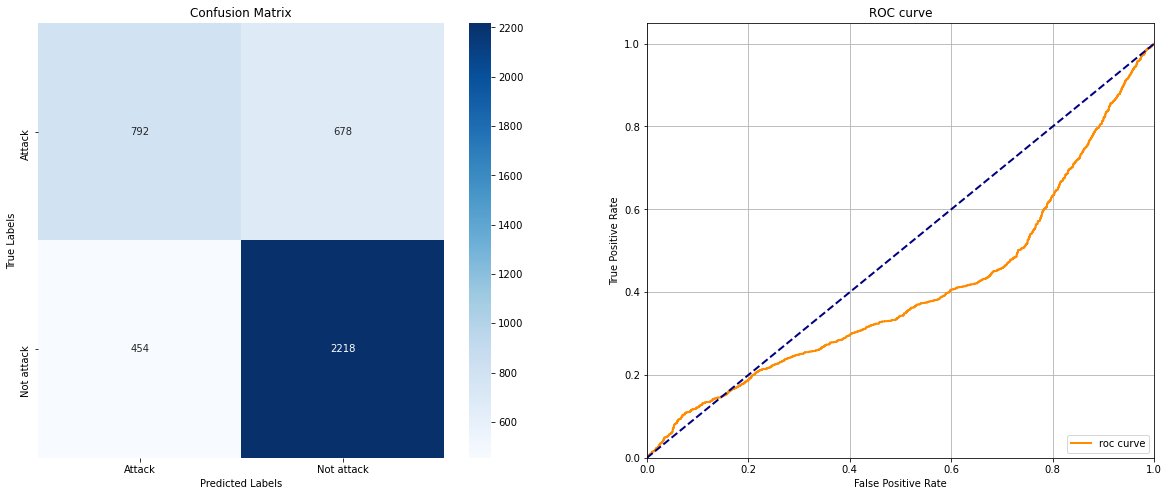

Accuracy is: 0.7267020762916465
Precision is: 0.6356340288924559
Recall is: 0.5387755102040817
F1 score is: 0.5832106038291606


In [24]:
pred = evaluate(model,dev_iter)

Classification Report:
              precision    recall  f1-score   support

           1     0.5442    0.7029    0.6135       175
           0     0.9150    0.8446    0.8784       663

    accuracy                         0.8150       838
   macro avg     0.7296    0.7738    0.7459       838
weighted avg     0.8376    0.8150    0.8231       838



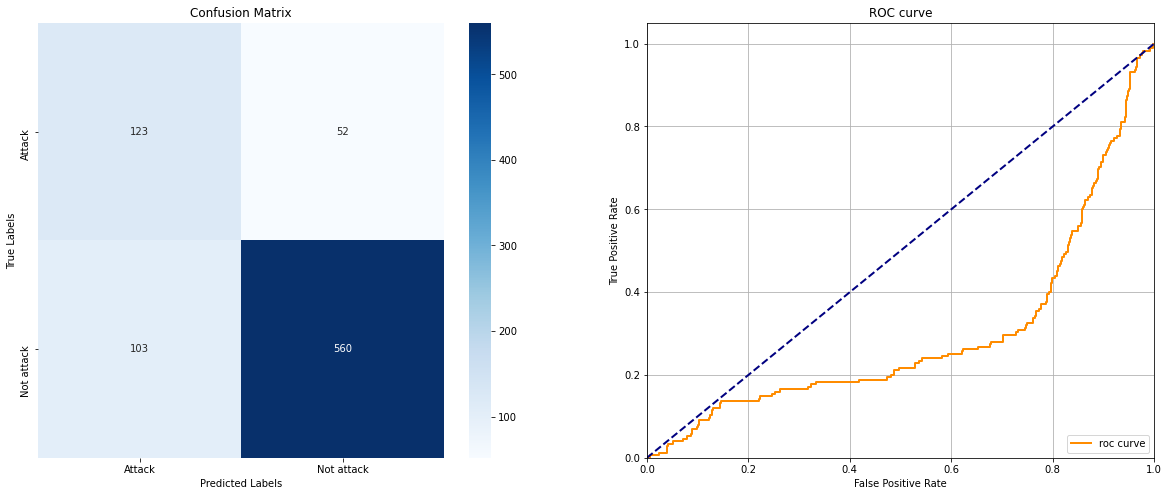

Accuracy is: 0.815035799522673
Precision is: 0.5442477876106194
Recall is: 0.7028571428571428
F1 score is: 0.6134663341645886


In [26]:
pred = evaluate(model,test_iter)

In [159]:
test_df.head()

,sentences,label
0,[CLS] all the home alones watching 8 mile [SEP...,0
1,[CLS] all the home alones watching 8 mile [SEP...,0
2,[CLS] the ending to 8 mile is my fav part of t...,0
3,[CLS] the ending to 8 mile is my fav part of t...,0
4,[CLS] the ending to 8 mile is my fav part of t...,1


In [61]:
print("The sample data set are:")
print("bert model 2:", (Test_cleaned['S1'][0], Test_cleaned['S2'][0]), 'Lable is:',test_df['label'][0], "Prediction:", pred[0])
print("bert model 2:", (Test_cleaned['S1'][20], Test_cleaned['S2'][20]), 'Lable is:',test_df['label'][20], "Prediction:", pred[20])

The sample data set are:
bert model 2: ('all the home alones watching 8 mile', 'the last rap battle in 8 mile nevr gets old ahah') Lable is: 0 Prediction: 0
bert model 2: ('ok good the end of 8 mile is on', 'the end of 8 mile makes me so happy') Lable is: 1 Prediction: 1
